Importing libraries

In [2]:
import numpy as np
from GBM import GBM
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['figure.subplot.hspace'] = 0.4
plt.rcParams['figure.subplot.wspace'] = 0.4

Preparing data

In [3]:
df = pd.read_csv("./Data/train.csv")
X = df.loc[:,~df.columns.isin(["score","Id"])].to_numpy()
y = df.loc[:,"score"].to_numpy()

print(X.shape)
print(y.shape)

(4141, 27)
(4141,)


Splitting Data

In [4]:
num_train = int(X.shape[0]*0.8)
num_val = int(X.shape[0]*0.1)
num_test = X.shape[0] - num_train - num_val

mask = np.random.choice(X.shape[0],X.shape[0])
X = X[mask]
print(X.shape)
X_train,X_val, X_test = np.split(X,[num_train,num_train + num_val])

mask = np.random.choice(y.shape[0],y.shape[0])
y = y[mask]
print(y.shape)
y_train,y_val, y_test = np.split(y,[num_train,num_train + num_val])

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4141, 27)
(4141,)
(3312, 27)
(414, 27)
(415, 27)
(3312,)
(414,)
(415,)


Training the regressor

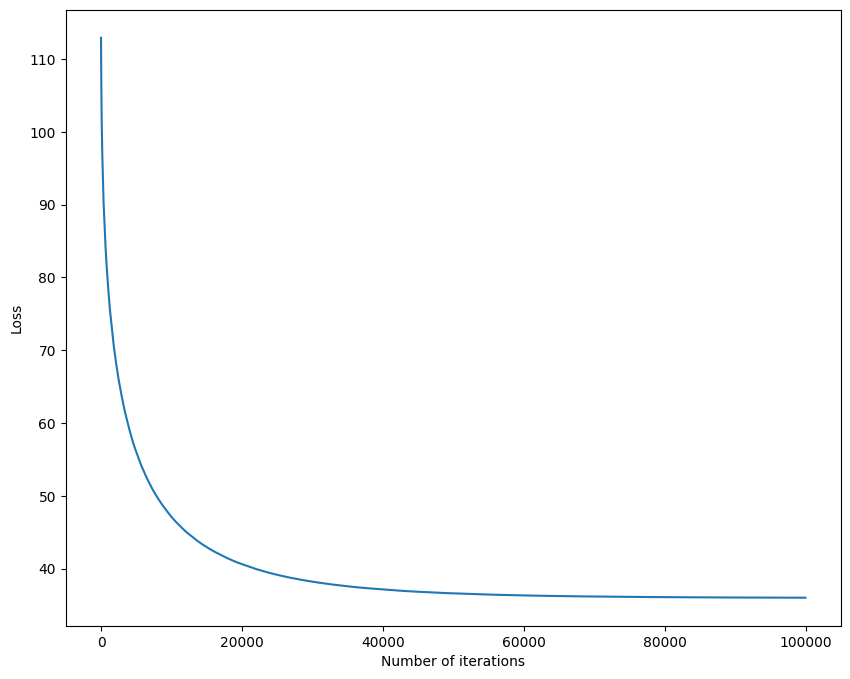

5.999745214866806


In [14]:
reg = GBM()
num_iter = 100000
hist = reg.train(X_train,y_train,num_iter,alpha = 1)
plt.plot(hist)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

y_train_pred = reg.predict(X_train)
train_loss = np.sqrt(np.mean((y_train - y_train_pred)**2))
print(train_loss)

Validation error

In [15]:
y_val_pred = reg.predict(X_val)
val_loss = np.sqrt(np.mean((y_val - y_val_pred)**2))
print(val_loss)

14.387806833168414


Test error

In [16]:
y_test_pred = reg.predict(X_test)
test_loss = np.sqrt(np.mean((y_test - y_test_pred)**2))
print(test_loss)

14.557694070642164
